In [1298]:
!pip install kagglehub

In [1299]:
#Import all relevant libraries
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os
import warnings
warnings.filterwarnings('ignore')
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [1301]:
folder_path = kagglehub.dataset_download("unsdsn/world-happiness")
files = os.listdir(folder_path)

In [1302]:
#Read in the csv file and convert to a Pandas dataframe
os.listdir(folder_path)
dataframes = {}

for file in files:
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path): 
        df = pd.read_csv(file_path)
        dataframes[file] = df

<h3>Load dataframes</h3>

In [1304]:
df_2015 = dataframes[list(dataframes.keys())[0]]
df_2016 = dataframes[list(dataframes.keys())[1]]
df_2017 = dataframes[list(dataframes.keys())[2]]
df_2018 = dataframes[list(dataframes.keys())[3]]
df_2019 = dataframes[list(dataframes.keys())[4]]

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

<h3>Now we should see each year data frame:</h3>

In [1307]:
df_2015.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
41,El Salvador,Latin America and Caribbean,42,6.130,0.05618,0.76454,1.02507,0.67737,0.40350,0.11776,0.10692,3.03500
38,Kuwait,Middle East and Northern Africa,39,6.295,0.04456,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634
55,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649
37,Taiwan,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323


In [1308]:
df_2016.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
94,Macedonia,Central and Eastern Europe,95,5.121,5.017,5.225,1.01930,0.78236,0.64738,0.27668,0.07047,0.23507,2.08947
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
27,United Arab Emirates,Middle East and Northern Africa,28,6.573,6.494,6.652,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507
126,Congo (Brazzaville),Sub-Saharan Africa,127,4.236,4.107,4.365,0.77109,0.47799,0.28212,0.37938,0.09753,0.12077,2.10681
66,Libya,Middle East and Northern Africa,67,5.615,5.406,5.824,1.06688,0.95076,0.52304,0.40672,0.10339,0.17087,2.39374


In [1309]:
df_2017.sample(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
28,Guatemala,29,6.454,6.566874,6.341126,0.872002,1.255585,0.540240,0.531311,0.283488,0.077223,2.893891
54,South Korea,55,5.838,5.922559,5.753441,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378
116,Iraq,117,4.497,4.622591,4.371409,1.102710,0.978613,0.501180,0.288556,0.199637,0.107216,1.318907
46,Uzbekistan,47,5.971,6.065538,5.876463,0.786441,1.548969,0.498273,0.658249,0.415984,0.246528,1.816914
144,Haiti,145,3.603,3.734715,3.471285,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168


In [1310]:
df_2018.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
148,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302
104,105,South Africa,4.724,0.940,1.410,0.330,0.516,0.103,0.056
13,14,Ireland,6.977,1.448,1.583,0.876,0.614,0.307,0.306


In [1311]:
df_2019.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
109,110,Palestinian Territories,4.696,0.657,1.247,0.672,0.225,0.103,0.066
65,66,Portugal,5.693,1.221,1.431,0.999,0.508,0.047,0.025
59,60,Kazakhstan,5.809,1.173,1.508,0.729,0.410,0.146,0.096


In [1312]:
#merged_df = pd.concat([df_2015,df_2016,df_2017], axis=1) # concat all dataframes on columns

In [1313]:
# Shape of each year dataset
print("df_2015 shape",df_2015.shape, "\ndf_2016 shape",df_2016.shape,
      "\ndf_2017 shape",df_2017.shape, "\ndf_2018 shape",df_2018.shape, "\ndf_2019 shape",df_2019.shape)

df_2015 shape (158, 12) 
df_2016 shape (157, 13) 
df_2017 shape (155, 12) 
df_2018 shape (156, 9) 
df_2019 shape (156, 9)


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [1315]:
# get some facts about each data
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [1316]:
# get some facts about each data
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [1317]:
# get some facts about each data
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [1318]:
# get some facts about each data
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [1319]:
# get some facts about each data
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [1320]:
# describe statistics of each data
df_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [1321]:
# describe statistics of each data
df_2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971


In [1322]:
# describe statistics of each data
df_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


In [1323]:
# describe statistics of each data
df_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
GDP per capita,156.0,0.891449,0.391921,0.000,0.61625,0.9495,1.19775,2.096
Social support,156.0,1.213237,0.302372,0.000,1.06675,1.2550,1.46300,1.644
Healthy life expectancy,156.0,0.597346,0.247579,0.000,0.42225,0.6440,0.77725,1.030
Freedom to make life choices,156.0,0.454506,0.162424,0.000,0.35600,0.4870,0.57850,0.724
Generosity,156.0,0.181006,0.098471,0.000,0.10950,0.1740,0.23900,0.598
Perceptions of corruption,155.0,0.112000,0.096492,0.000,0.05100,0.0820,0.13700,0.457


In [1324]:
# describe statistics of each data
df_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [1325]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [1326]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [1327]:
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [1328]:
df_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [1329]:
df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [1333]:
# its taken from Gallup World Poll, therefore it is reliable

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [1335]:
# its taken from 2015 to 2019

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


##### to confirm that the data is consistant, we need to filter the similar columns in all years datasets

<h2> let us rename the identical columns thats differ from other dataframes</h2>
<em> as you can see above, df_2017, df_2018, df_2019 has similar columns to df_2015 and df_2016 but has a different names</em>

In [1339]:
# rename each data
df_2017_new_names = {
    'Happiness.Rank':'Happiness Rank',
    'Happiness.Score':'Happiness Score',
    'Whisker.high':'Whisker high',
    'Whisker.low':'Whisker low',
    'Dystopia.Residual':'Dystopia Residual',
    'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
    'Health..Life.Expectancy.':'Health (Life Expectancy)',
    'Trust..Government.Corruption.':'Trust (Government Corruption)'
}

df_2018_new_names = {
'Score':'Happiness Score',
'Overall rank':'Happiness Rank',
'Country or region':'Country',
'Healthy life expectancy':'Health (Life Expectancy)',
'Freedom to make life choices':'Freedom',
'GDP per capita':'Economy (GDP per Capita)'
}


df_2019_new_names = {
'Score':'Happiness Score',
'Overall rank':'Happiness Rank',
'Country or region':'Country',
'Healthy life expectancy':'Health (Life Expectancy)',
'Freedom to make life choices':'Freedom',
'GDP per capita':'Economy (GDP per Capita)'

}

# rename each data
df_2017.rename(df_2017_new_names, axis=1, inplace=True)
df_2018.rename(df_2018_new_names, axis=1, inplace=True)
df_2019.rename(df_2019_new_names, axis=1, inplace=True)

In [1340]:
df_2017.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [1341]:
df_2018.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [1342]:
df_2019.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [1343]:
# to filter similar columns, we will use intersection method provided by pandas

# List of DataFrames
dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019]

# Find common columns using intersection
common_columns = set.intersection(*[set(df.columns) for df in dataframes])

# print common columns
common_columns

{'Country',
 'Economy (GDP per Capita)',
 'Freedom',
 'Generosity',
 'Happiness Rank',
 'Happiness Score',
 'Health (Life Expectancy)'}

In [1344]:
# now we should check their values and datatype to confirm their consistency

# Create a dictionary to map dataframe names to actual dataframes
dataframes = {
    'df_2015': df_2015,
    'df_2016': df_2016,
    'df_2017': df_2017,
    'df_2018': df_2018,
    'df_2019': df_2019
}

# Check data types and consistency for common columns across dataframes
for column in common_columns:
    print(f"Column: {column}")
    for df_name, df in dataframes.items():
        if column in df.columns:
            print(f"  - Dataframe: {df_name} - Data type: {df[column].dtype}")


Column: Happiness Score
  - Dataframe: df_2015 - Data type: float64
  - Dataframe: df_2016 - Data type: float64
  - Dataframe: df_2017 - Data type: float64
  - Dataframe: df_2018 - Data type: float64
  - Dataframe: df_2019 - Data type: float64
Column: Generosity
  - Dataframe: df_2015 - Data type: float64
  - Dataframe: df_2016 - Data type: float64
  - Dataframe: df_2017 - Data type: float64
  - Dataframe: df_2018 - Data type: float64
  - Dataframe: df_2019 - Data type: float64
Column: Happiness Rank
  - Dataframe: df_2015 - Data type: int64
  - Dataframe: df_2016 - Data type: int64
  - Dataframe: df_2017 - Data type: int64
  - Dataframe: df_2018 - Data type: int64
  - Dataframe: df_2019 - Data type: int64
Column: Freedom
  - Dataframe: df_2015 - Data type: float64
  - Dataframe: df_2016 - Data type: float64
  - Dataframe: df_2017 - Data type: float64
  - Dataframe: df_2018 - Data type: float64
  - Dataframe: df_2019 - Data type: float64
Column: Economy (GDP per Capita)
  - Dataframe: 

In [1345]:
# 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


<h3>
    as kaggle data card explained,
    the six happiness factors are:</h3>
    <ol>
        <li>Family</li>
        <li>GDP per Capita</li>
        <li>Life expectency</li>
        <li>Freedom</li>
        <li>Generosity</li>
        <li>Trust Government Corruption</li>
    </ol>
<em>Therefore, any other factor is not relevent to the study</em>

In [1348]:
# go to clean step

<h2>After we have dealed with inconsistencies and dropped unrelevent columns, we now will concat all 3 dataframes together and then deal with the missing values</h2>
<em>since there are some columns that are not in other dataframes and it is risky to remove these columns, we will use full outer join</em>

In [1350]:
len(df_2015)

158

In [1351]:
len(df_2016)

157

In [1352]:
len(df_2017)

155

In [1353]:
len(df_2018)

156

In [1354]:
len(df_2019)

156

In [1355]:
df_2015['Year_2015'] = '2015'
df_2016['Year_2016'] = '2016'
df_2017['Year_2017'] = '2017'
df_2018['Year_2018'] = '2018'
df_2019['Year_2019'] = '2019'

In [1356]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year_2015
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [1358]:
# check duplication in each data

for df_name, df in dataframes.items():
 print({df_name}, df.duplicated().sum())

{'df_2015'} 0
{'df_2016'} 0
{'df_2017'} 0
{'df_2018'} 0
{'df_2019'} 0


In [1359]:
# there are no duplicated rows

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [1361]:
# check  number missing values in each data
for df_name, df in dataframes.items():
    print(f"{'='*40}")
    print(f" DataFrame: {df_name}")
    print(f"{'-'*40}")
    print("Missing Values Summary:\n")
    print(df.isnull().sum().sort_values(ascending=False))
    print(f"{'='*40}\n")


 DataFrame: df_2015
----------------------------------------
Missing Values Summary:

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year_2015                        0
dtype: int64

 DataFrame: df_2016
----------------------------------------
Missing Values Summary:

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Go

<p>We will use an imputation with a constant value for the following reasons:</p>
<ol>
    <li>Year null values has no effect on result if we replace missing values with a constant since each row has its own information with the relevant year</li>
    <li>Standard Error is not one of the six happiness factors so if we replace missing values with a constant, it does not effect on result</li>
</ol>

In [1363]:
# go to clean data

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [1365]:
# check columns types 

In [1366]:
# go to clean them 

In [1367]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [1370]:
df_2015.drop(columns=['Region'],axis=1,inplace=True)
df_2016.drop(columns=['Lower Confidence Interval','Upper Confidence Interval','Region'],axis=1,inplace=True)
df_2017.drop(['Whisker high','Whisker low'],axis=1,inplace=True)
df_2018.drop(['Perceptions of corruption'],axis=1,inplace=True)
df_2019.drop(['Perceptions of corruption'],axis=1,inplace=True)

In [1371]:
merged_df = pd.merge(df_2015,df_2016,how='outer')
merged_df = pd.merge(merged_df,df_2017, how='outer')
merged_df = pd.merge(merged_df,df_2018, how='outer')
merged_df = pd.merge(merged_df,df_2019, how='outer')

In [1372]:
merged_df.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year_2015                         object
Year_2016                         object
Year_2017                         object
Social support                   float64
Year_2018                         object
Year_2019                         object
dtype: object

In [1373]:
# combine the year columns into a new 'year' column
merged_df['Year'] = merged_df[['Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019']].bfill(axis=1).iloc[:, 0]

In [1374]:
merged_df.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year_2015,Year_2016,Year_2017,Social support,Year_2018,Year_2019,Year
0,Afghanistan,141,3.794,NaN,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801,NaN,NaN,2017,NaN,NaN,NaN,2017
1,Afghanistan,145,3.632,NaN,0.332000,NaN,0.255000,0.08500,NaN,0.191000,NaN,NaN,NaN,NaN,0.537,2018,NaN,2018
2,Afghanistan,153,3.575,0.03084,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100,2015,NaN,NaN,NaN,NaN,NaN,2015
3,Afghanistan,154,3.203,NaN,0.350000,NaN,0.361000,0.00000,NaN,0.158000,NaN,NaN,NaN,NaN,0.517,NaN,2019,2019
4,Afghanistan,154,3.360,NaN,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580,NaN,2016,NaN,NaN,NaN,NaN,2016


In [1375]:
merged_df.drop(['Year_2015','Year_2016','Year_2017', 'Year_2018', 'Year_2019'],axis=1,inplace=True)

In [1376]:
merged_df.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Social support,Year
0,Afghanistan,141,3.794,NaN,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801,NaN,2017
1,Afghanistan,145,3.632,NaN,0.332000,NaN,0.255000,0.08500,NaN,0.191000,NaN,0.537,2018
2,Afghanistan,153,3.575,0.03084,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100,NaN,2015
3,Afghanistan,154,3.203,NaN,0.350000,NaN,0.361000,0.00000,NaN,0.158000,NaN,0.517,2019
4,Afghanistan,154,3.360,NaN,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580,NaN,2016


In [1377]:
print("Missing Values Summary:\n")
merged_df.isnull().sum().sort_values(ascending=False)

Missing Values Summary:



Standard Error                   624
Social support                   470
Family                           312
Trust (Government Corruption)    312
Dystopia Residual                312
Country                            0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Health (Life Expectancy)           0
Freedom                            0
Generosity                         0
Year                               0
dtype: int64

In [1378]:
merged_df['Standard Error'].fillna(0,inplace=True)

In [1379]:
merged_df['Social support'].fillna(0,inplace=True)

In [1380]:
merged_df['Family'].fillna(0,inplace=True)

In [1381]:
merged_df['Trust (Government Corruption)'].fillna(0,inplace=True)

In [1382]:
merged_df['Dystopia Residual'].fillna(0,inplace=True)

In [1383]:
print("Missing Values Summary:\n")
merged_df.isnull().sum().sort_values(ascending=False)

Missing Values Summary:



Country                          0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Social support                   0
Year                             0
dtype: int64

In [1384]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [1386]:
# go back to 7th dimension Accuracy 

### check outliers

In [1388]:
# check outliers 
# Select only the numerical columns in merged_df using select_dtypes
numerical_cols = merged_df.select_dtypes(include=['number']).columns

# Calculate Z-scores for each numerical column in merged_df
z_scores = zscore(merged_df[numerical_cols])

# Create a boolean dataframe where True indicates an outlier
outliers = (abs(z_scores) > 3)

# Add a column to merged_df indicating if the row contains an outlier
merged_df_outliers = merged_df.copy()
merged_df_outliers['Outlier'] = outliers.any(axis=1)

# Save rows that contain outliers
outlier_rows = merged_df_outliers[merged_df_outliers['Outlier']]

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

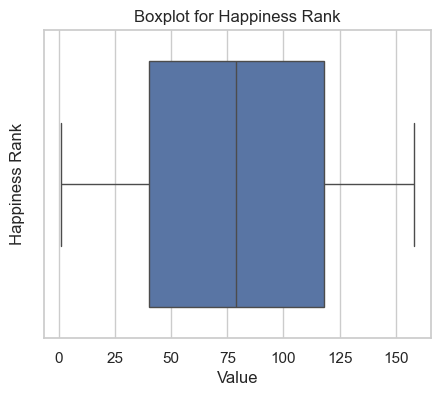

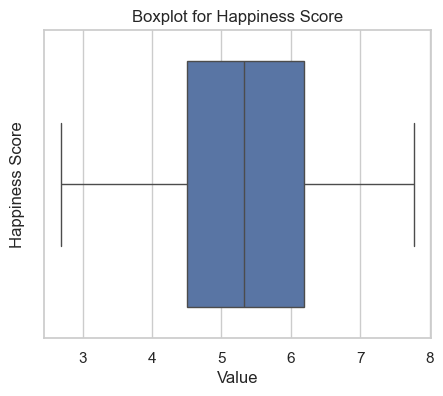

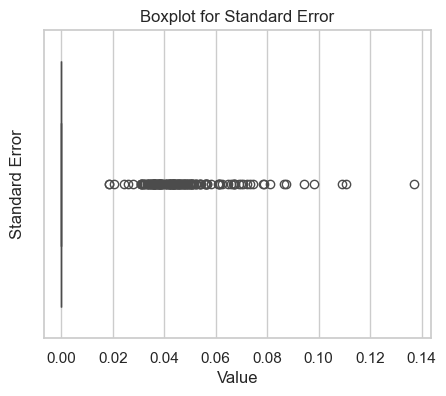

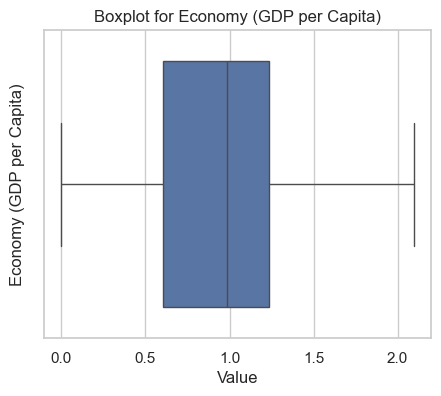

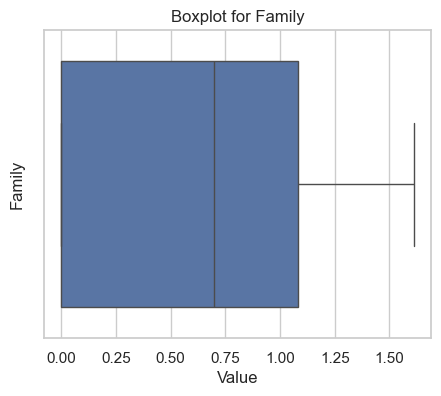

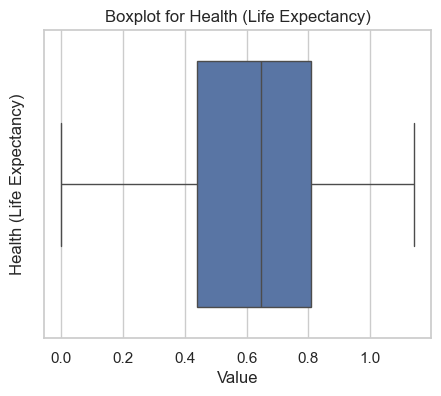

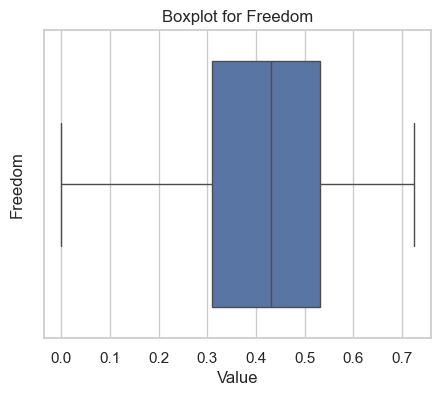

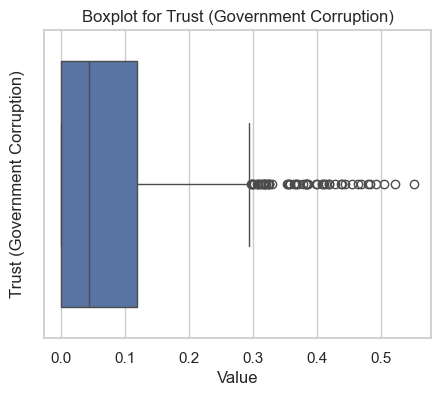

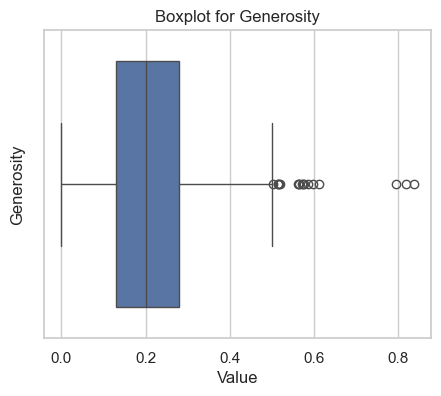

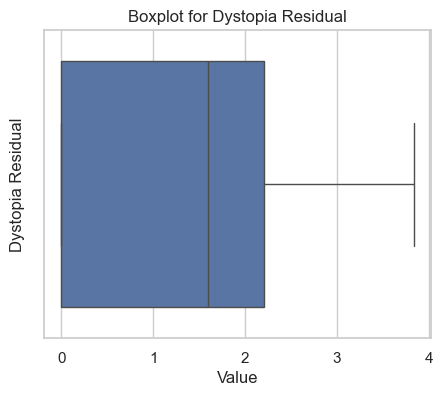

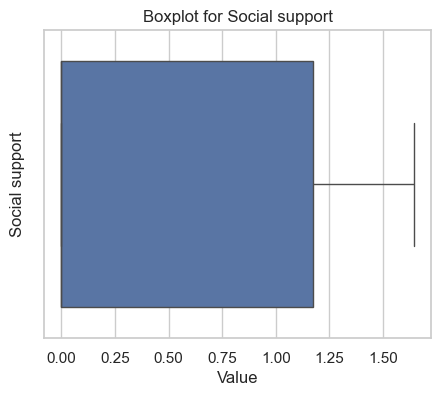

In [1391]:
# show outliers for visiualization

# Create a boxplot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=merged_df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel('Value') 
    plt.ylabel(col)      # Set y-axis label to the column name
    plt.show()

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & numerical --> (scatter plot, histogram, box plot)**

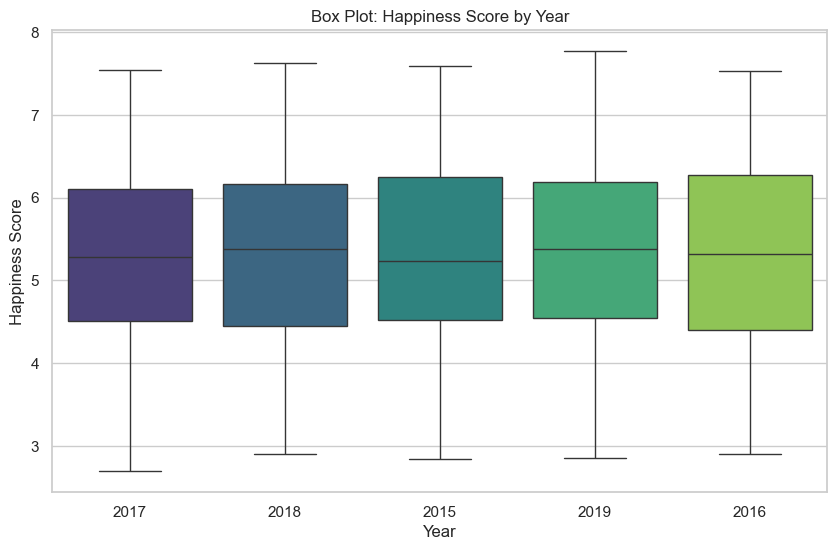

In [1394]:
# Create a boxplot chart to show the relationship between Year and Happiness score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Happiness Score', data=merged_df,  palette='viridis')
plt.title('Box Plot: Happiness Score by Year')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.show()

**numerical & numerical --> (Scatter plot)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

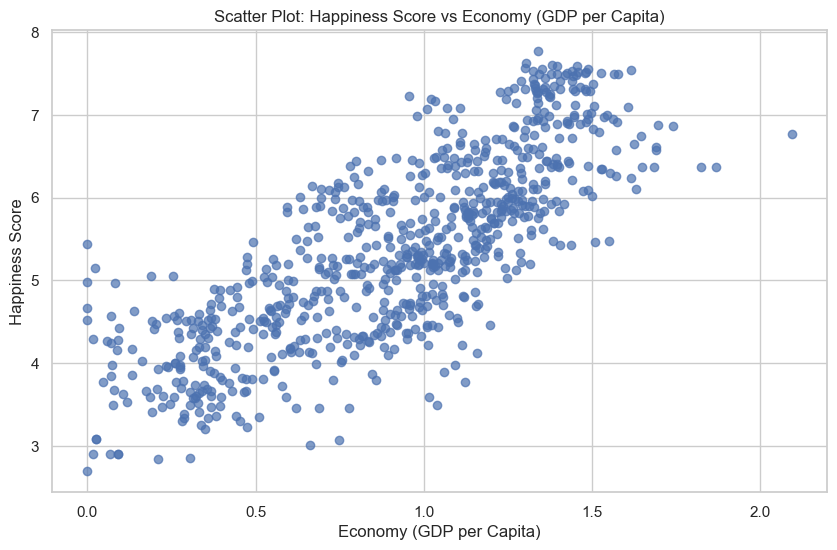

In [1397]:
# visualize the relationship between Happiness Score and Economy (GDP per Capita) using scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Economy (GDP per Capita)'], merged_df['Happiness Score'], alpha=0.7)
plt.title('Scatter Plot: Happiness Score vs Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

### Dealing with outliers:

In [1399]:
print("percentage of ouliers in our clean dataset is:", round((len(outlier_rows)/len(merged_df))*100), "%")

percentage of ouliers in our clean dataset is: 5 %


##### then removing the outliers is the best choice

In [1401]:
# Remove outliers from merged_df
cleaned_df = merged_df[~merged_df_outliers['Outlier']]
cleaned_df['Year'] = cleaned_df['Year'].astype(int)

# Answers

### What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?

In [1404]:
# Find the countries with the highest overall happiness for each year
highest_happiness_by_year = cleaned_df.loc[cleaned_df.groupby('Year')['Happiness Score'].idxmax()]
highest_happiness_by_year[['Country', 'Happiness Score', 'Year']].style.hide(axis='index')


Country,Happiness Score,Year
Iceland,7.561000,2015
Iceland,7.501000,2016
Norway,7.537000,2017
Finland,7.632000,2018
Finland,7.769000,2019


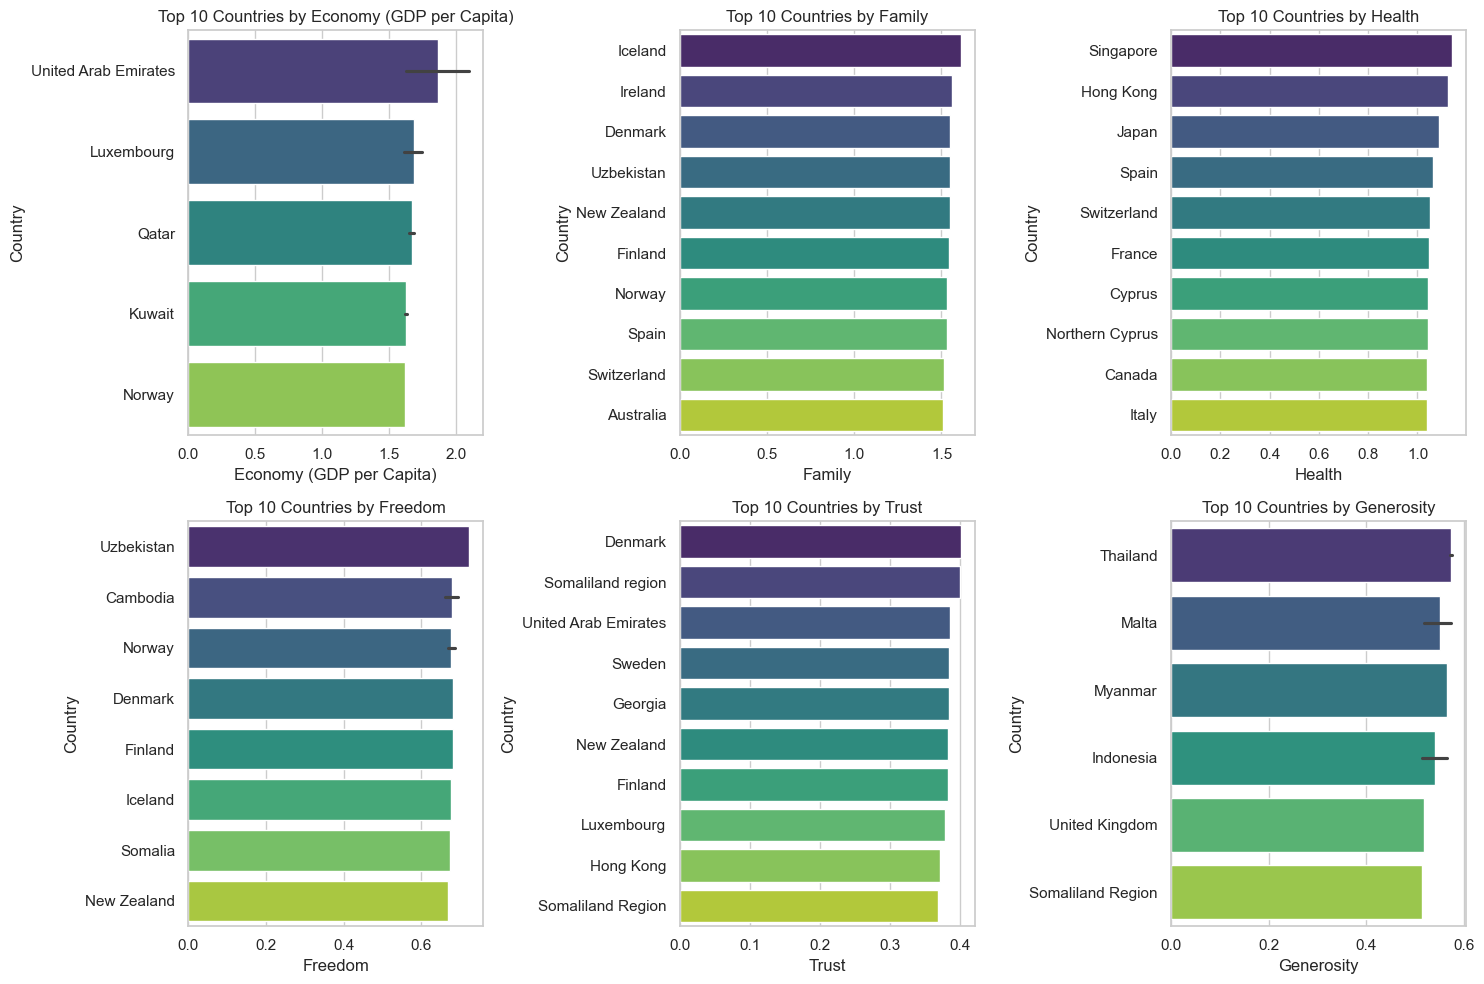

In [1405]:
# Define the factors and their corresponding titles
factors = {
    'Economy (GDP per Capita)': 'Economy (GDP per Capita)',
    'Family': 'Family',
    'Health (Life Expectancy)': 'Health',
    'Freedom': 'Freedom',
    'Trust (Government Corruption)': 'Trust',
    'Generosity': 'Generosity'
}

# Create a new figure with subplots
plt.figure(figsize=(15, 10))

# Loop through each factor to create a horizontal bar chart
for i, (factor, title) in enumerate(factors.items()):
    # Get the top 10 countries for the current factor
    top_countries = cleaned_df.nlargest(10, factor)[['Country', factor]]

    # Create a subplot for each factor
    plt.subplot(2, 3, i + 1)
    sns.barplot(data=top_countries, y='Country', x=factor, palette='viridis')
    plt.title(f'Top 10 Countries by {title}')
    plt.xlabel(title)
    plt.ylabel('Country')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?

In [1407]:
# Select relevant columns and filter for the years of interest
relevant_cols = ['Country', 'Year', 'Happiness Rank', 'Happiness Score']
filtered_df = cleaned_df[relevant_cols]

# Pivot the dataframe to have years as columns
pivot_df = filtered_df.pivot(index='Country', columns='Year', values=['Happiness Rank', 'Happiness Score'])

# Flatten the MultiIndex columns for easier access
pivot_df.columns = [f"{metric}_{year}" for metric, year in pivot_df.columns]

# Calculate the changes in rank and score
pivot_df['Rank_Change_2015_2016'] = pivot_df['Happiness Rank_2015'] - pivot_df['Happiness Rank_2016']
pivot_df['Score_Change_2015_2016'] = pivot_df['Happiness Score_2016'] - pivot_df['Happiness Score_2015']

pivot_df['Rank_Change_2016_2017'] = pivot_df['Happiness Rank_2016'] - pivot_df['Happiness Rank_2017']
pivot_df['Score_Change_2016_2017'] = pivot_df['Happiness Score_2017'] - pivot_df['Happiness Score_2016']

# Select relevant summary columns
summary = pivot_df[['Rank_Change_2015_2016', 'Score_Change_2015_2016', 
                    'Rank_Change_2016_2017', 'Score_Change_2016_2017']]

summary.reset_index(inplace=True)

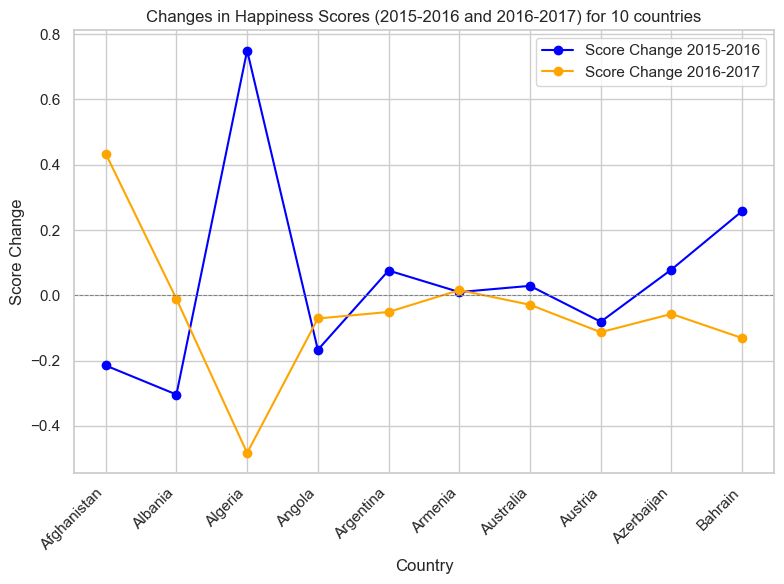

In [1408]:
plt.figure(figsize=(8, 6))

# Plotting the changes in Happiness Scores over the years
plt.plot(summary['Country'].head(10), summary['Score_Change_2015_2016'].head(10), marker='o', label='Score Change 2015-2016', color='blue')
plt.plot(summary['Country'].head(10), summary['Score_Change_2016_2017'].head(10) , marker='o', label='Score Change 2016-2017', color='orange')

# Customizing the plot
plt.title('Changes in Happiness Scores (2015-2016 and 2016-2017) for 10 countries')
plt.xlabel('Country')
plt.ylabel('Score Change')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Add a horizontal line at y=0 for reference
plt.legend()
# Adjust layout
plt.tight_layout()  
plt.show()

### Did any country experience a significant increase or decrease in happiness?

In [1410]:
# Group by country and year to get the mean happiness score
grouped_df = cleaned_df.groupby(['Country', 'Year'])['Happiness Score'].mean().reset_index()

# Calculate the change in happiness score between consecutive years
grouped_df['Happiness Change'] = grouped_df.groupby('Country')['Happiness Score'].diff()

# Define 40% threshold for significant changes 
threshold = 0.40
significant_changes = grouped_df[(abs(grouped_df['Happiness Change']) > threshold)]

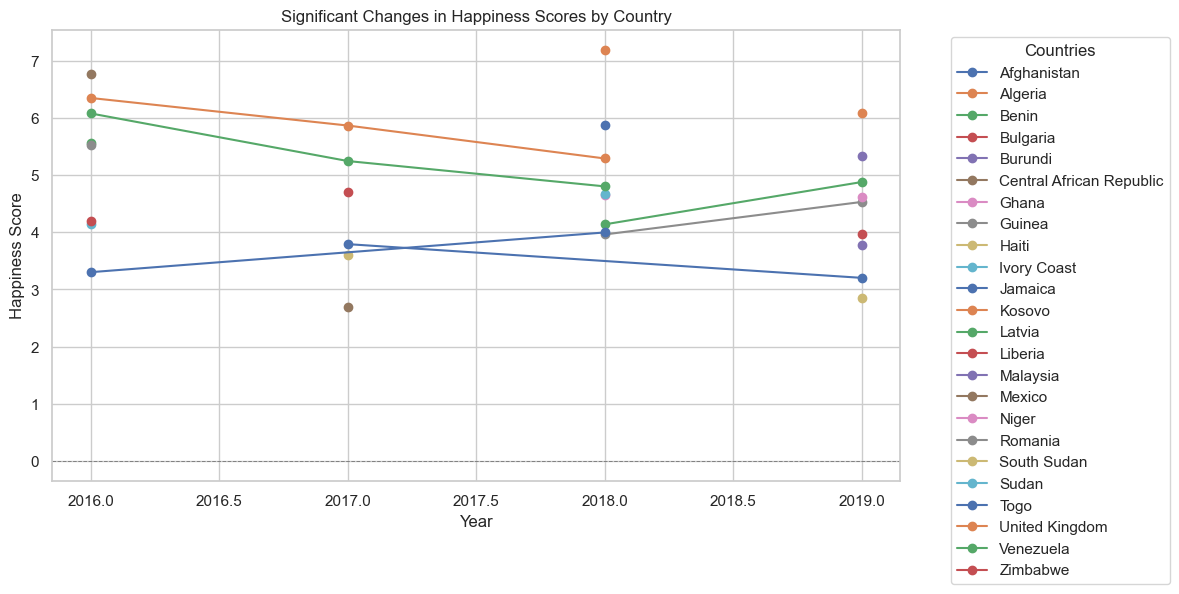

In [1411]:
plt.figure(figsize=(12, 6))
for country in significant_changes['Country'].unique():
    country_data = significant_changes[significant_changes['Country'] == country]
    plt.plot(country_data['Year'], country_data['Happiness Score'], marker='o', label=country)

plt.title('Significant Changes in Happiness Scores by Country')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.axhline(0, color='gray', linestyle='--', lw=0.7)  # Add a horizontal line at 0 for reference
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### What is the Saudi Arabia position in all years of Happiness scors

In [1413]:
# Filter the dataframe for Saudi Arabia
saudi_arabia_data = cleaned_df[cleaned_df['Country'] == 'Saudi Arabia']

# Select relevant columns to display
result = saudi_arabia_data[['Year', 'Happiness Rank', 'Happiness Score']].sort_values(by='Year')

# show the result
result.style.hide(axis='index')

Year,Happiness Rank,Happiness Score
2015,35,6.411000
2016,34,6.379000
2017,37,6.344000
2018,33,6.371000
2019,28,6.375000
